In [2]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', palette='deep')

Populating the interactive namespace from numpy and matplotlib


In [62]:
from palettable.tableau import Tableau_10
from palettable.tableau import Tableau_20
cm_t10 = plt.cm.get_cmap(Tableau_10.mpl_colormap)
cm_t20 = plt.cm.get_cmap(Tableau_20.mpl_colormap)

In [588]:
#set time span
tst=pd.to_datetime('2016-04-10')
ten=pd.to_datetime('2016-12-15')

# DWD Weather

In [589]:
#get DWD Weather
air_t = pd.read_csv('dwd/collect/air_t.txt',sep=';',na_values=-999)
cloud = pd.read_csv('dwd/collect/cloud.txt',sep=';',na_values=-999)
p = pd.read_csv('dwd/collect/p.txt',sep=';',na_values=-999)
precip = pd.read_csv('dwd/collect/precip.txt',sep=';',na_values=-999)
rad = pd.read_csv('dwd/collect/rad.txt',sep=';',na_values=-999)
soil_t = pd.read_csv('dwd/collect/soil_t.txt',sep=';',na_values=-999)
sun_h = pd.read_csv('dwd/collect/sun_h.txt',sep=';',na_values=-999)
wind = pd.read_csv('dwd/collect/wind.txt',sep=';',na_values=-999)

air_t.index=pd.to_datetime(air_t.iloc[:,1],format='%Y%m%d%H')
cloud.index=pd.to_datetime(cloud.iloc[:,1],format='%Y%m%d%H')
p.index=pd.to_datetime(p.iloc[:,1],format='%Y%m%d%H')
precip.index=pd.to_datetime(precip.iloc[:,1],format='%Y%m%d%H')
rad.index=pd.to_datetime(rad.iloc[:,1],format='%Y%m%d%H')
soil_t.index=pd.to_datetime(soil_t.iloc[:,1],format='%Y%m%d%H')
sun_h.index=pd.to_datetime(sun_h.iloc[:,1],format='%Y%m%d%H')
wind.index=pd.to_datetime(wind.iloc[:,1],format='%Y%m%d%H')

dwd=pd.concat([air_t.loc[tst:ten,[' LUFTTEMPERATUR','REL_FEUCHTE']],
cloud.loc[tst:ten,' GESAMT_BEDECKUNGSGRAD'],
p.loc[tst:ten,[' LUFTDRUCK_REDUZIERT', 'LUFTDRUCK_STATIONSHOEHE']],
precip.loc[tst:ten,[' NIEDERSCHLAG_GEFALLEN_IND', 'NIEDERSCHLAGSHOEHE', 'NIEDERSCHLAGSFORM']],
rad.loc[tst:ten,[' SONNENSCHEINDAUER', 'DIFFUS_HIMMEL_KW_J', 'GLOBAL_KW_J',
       'ATMOSPHAERE_LW_J', 'SONNENZENIT']],
soil_t.loc[tst:ten,[' ERDBODENTEMPERATUR', 'MESS_TIEFE', ' ERDBODENTEMPERATUR.1',
       'MESS_TIEFE.1', ' ERDBODENTEMPERATUR.2', 'MESS_TIEFE.2',
       ' ERDBODENTEMPERATUR.3', 'MESS_TIEFE.3', ' ERDBODENTEMPERATUR.4',
       'MESS_TIEFE.4']],
sun_h.loc[tst:ten,' STUNDENSUMME_SONNENSCHEIN'],
wind.loc[tst:ten,[' WINDGESCHWINDIGKEIT', 'WINDRICHTUNG']]], join='outer', axis = 1)

#export
#dwd.to_excel('dwd_braunschweig_662.xlsx')

# KIT DATA

In [283]:
#Get KIT data
KIT=pd.read_csv('200016_20161206082749.csv', comment='<', skiprows=61, na_values=['(NoIndexedValue)','(EndOfFile)'])
KIT=KIT.loc[KIT.iloc[:,0]!='NO']
KIT.index=pd.to_datetime(KIT.iloc[:,1],format='%d.%m.%Y %H:%M:%S')
KIT=KIT.iloc[:-1,2:].apply(lambda x: pd.to_numeric(x, errors='coerce')) #[2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,28,30,31,32,33,34,35,36,37,38,39]
KIT=KIT.loc[KIT.index>pd.to_datetime('2016-05-01 00:01:26')]
KIT.columns=['T3P_3_20_theta','T3P_3_20_eC','T3P_1_45_theta','T3P_1_45_eC','c_theta','c_eC','T3P_2_20_theta','T3P_2_20_eC','T3P_4_45_theta','T3P_4_45_eC','T3P_4_20_theta','T3P_4_20_eC','T3P_3_45_theta','T3P_3_45_eC','TM1_1_T','TM1_1_pF','TM1_2_T','TM1_2_pF','TM1_3_T','TM1_3_pF','TM1_4_T','TM1_4_pF','T3P_1_20_theta','T3P_1_20_eC','dummy','pico32_1_theta','pico32_1_T','pico32_1_eC','pico32_4_theta','pico32_4_T','pico32_4_eC','pico32_3_theta','pico32_3_T','pico32_3_eC','pico32_2_theta','pico32_2_T','pico32_2_eC','HKBat']

/Users/cojack/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [286]:
#filter for erroneous data
def ed_filter(data):
    'this is a simple filter looking for values without abrupt changes and stationarity over time'
    return data[((data.rolling(5).std()<data.rolling(20).std().mean()) & (data.diff().abs()>0.))]

def edp_filter(data,wid=20):
    if type(data)==pd.core.frame.DataFrame:
        return data.rolling(4).max().apply(ed_filter,axis=0).rolling(wid).mean()
    elif type(data)==pd.core.series.Series:
        return ed_filter(data.rolling(4).max()).rolling(wid).mean()


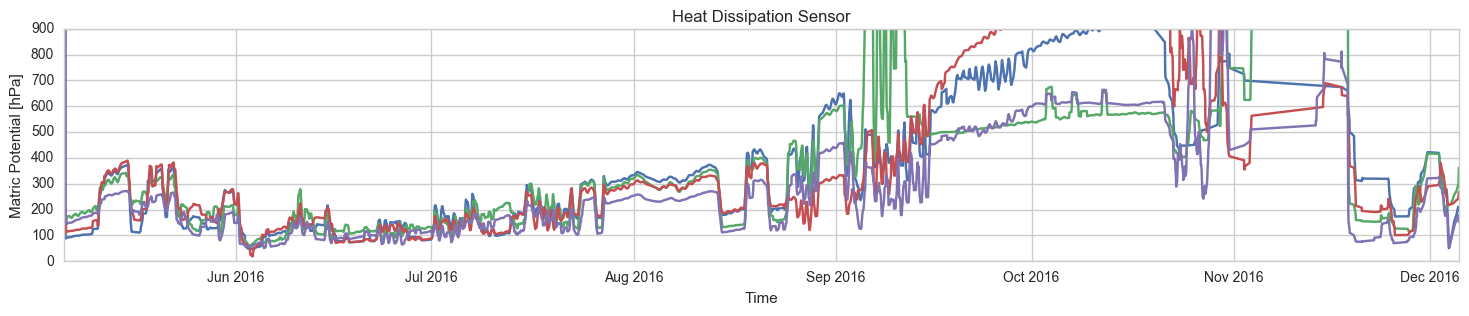

In [290]:
plot(10**edp_filter(KIT.TM1_1_pF))
plot(10**edp_filter(KIT.TM1_2_pF))
plot(10**edp_filter(KIT.TM1_3_pF))
plot(10**edp_filter(KIT.TM1_4_pF))
ylim(0,900)
title('Heat Dissipation Sensor')
ylabel('Matric Potential [hPa]')
xlabel('Time')

In [ ]:
KIT_sensor=pd.Series(KIT.columns.astype(str)).apply(lambda x: x.split('_')[0])
KIT_meas=pd.Series(KIT.columns.astype(str)).apply(lambda x: x.split('_')[-1])


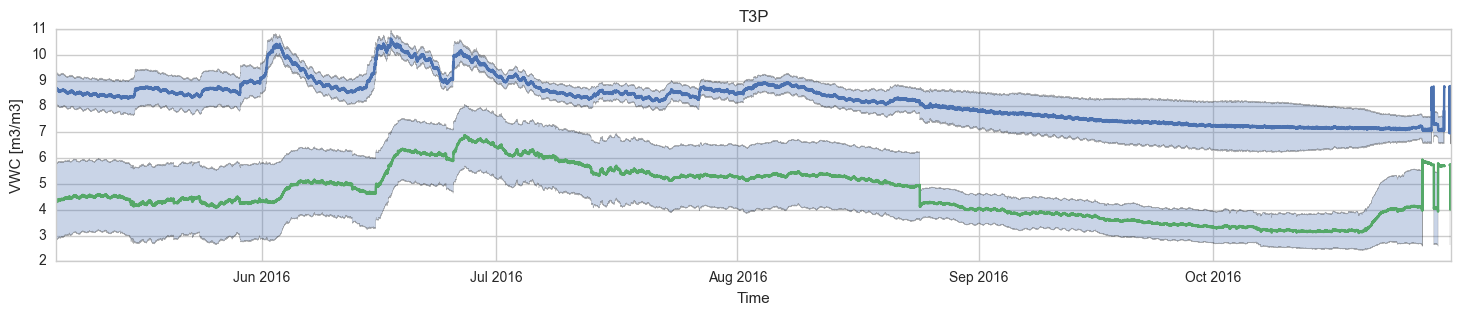

In [295]:
idx=pd.Series(KIT.columns.astype(str))[((KIT_sensor=='T3P') & (KIT_meas=='theta'))].values
Ux=KIT[idx[[0,2,4,6]]].copy()
Ux[Ux<=2]=np.nan
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-',label='depth 0.2 m')

Ux=KIT[idx[[1,3,5]]].copy()
Ux[Ux<=2]=np.nan
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-',label='depth 0.4 m')

title('T3P')
xlabel('Time')
ylabel('VWC [m3/m3]')


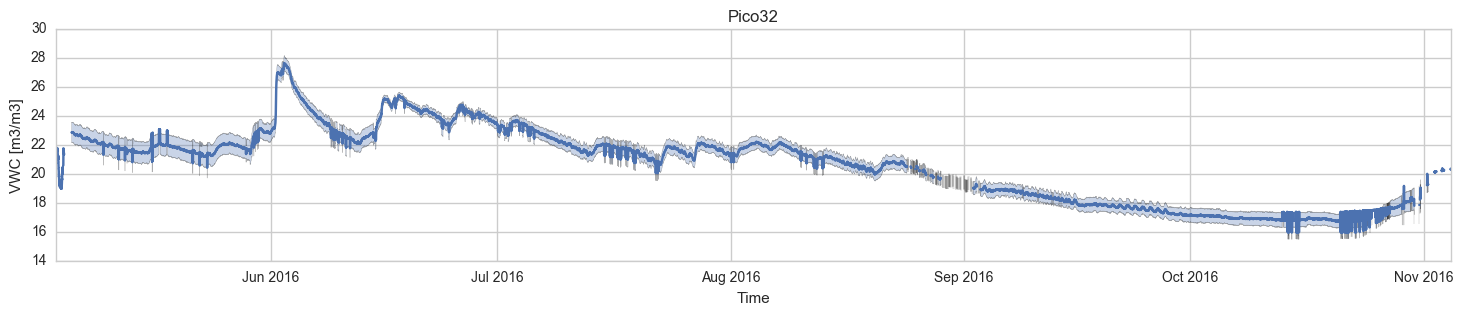

In [298]:
idx=pd.Series(KIT.columns.astype(str))[((KIT_sensor=='pico32') & (KIT_meas=='theta'))].values
Ux=KIT[idx].copy()
Ux[Ux<=10.]=np.nan
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('Pico32')
xlabel('Time')
ylabel('VWC [m3/m3]')



# TUBS DATA

In [476]:
#TUBS=pd.read_excel('./Monitoring_Daten_Stand0916/TU_Braunschweig/Masterdatei-2016.xlsx',sheetname='raw data')
TUBS=pd.read_excel('./Daten_Stand_01_2017/TU Braunschweig/Masterdatei-2016.xlsx',sheetname='Daten sortiert')
TUBS.index=pd.to_datetime(TUBS.Timestamp)
TUBS=TUBS.loc[TUBS.index>pd.to_datetime('2016-04-19 00:01:26')]

In [477]:
TUBS_sensor=pd.Series(TUBS.columns.astype(str)).apply(lambda x: x.split('-')[0])
TUBS_meas=pd.Series(TUBS.columns.astype(str)).apply(lambda x: x.split(' ')[-1][1:-1])

In [478]:
TUBS_meas.unique()

array(['imestam', 'hPa', '°C', 'pF', 'epsi', '%', 'kPa'], dtype=object)

In [479]:
#j=0
#for ix in TUBS.columns:
#    print(str(j),': ',ix)
#    j+=1
TUBS_sensor.unique()

array(['Timestamp', 'T4', 'T8', 'SIS', 'MPS2', 'pFMeter', 'T5', 'ECTM',
       'EC5', 'ML2x', 'Pico64', '10HS', 'MPS1', 'MPS6', 'Trase_TDR'], dtype=object)

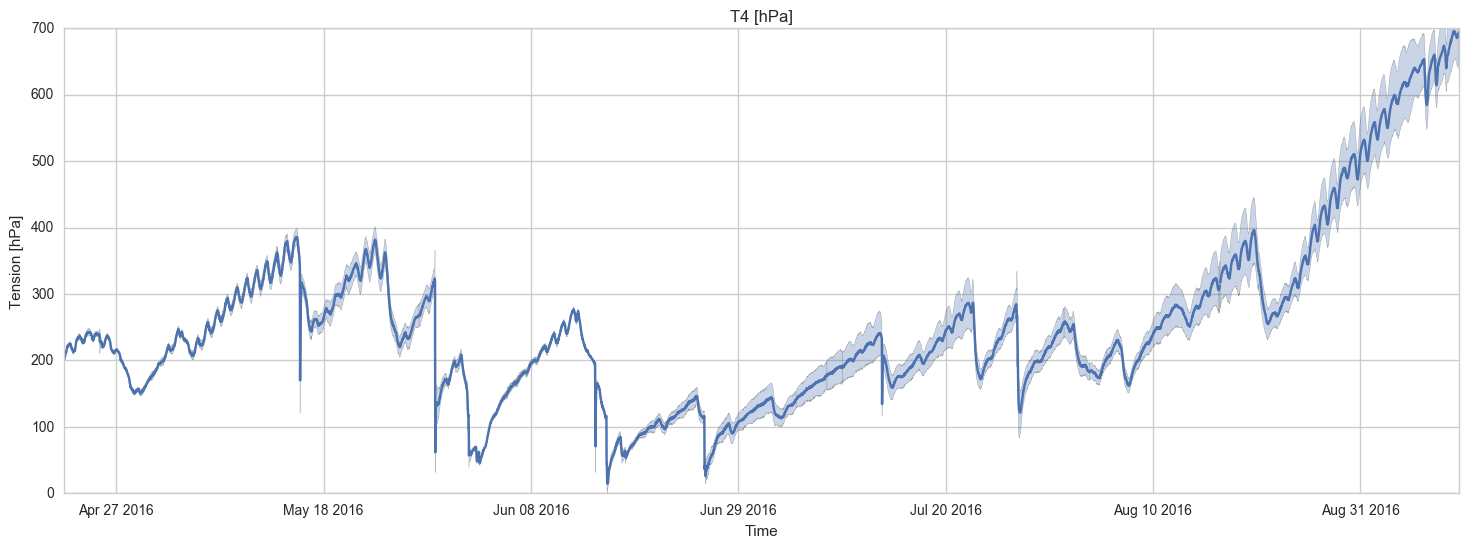

In [166]:
tst=pd.to_datetime('2016-04-20')
ten=pd.to_datetime('2016-09-10')
sens='T4'

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor==sens))].values
Tx=TUBS.loc[tst:ten,idx].copy()#.apply(lambda x: pd.to_numeric(x, errors='coerce'))
Tx[Tx>900]=np.nan
Tx[Tx<=0]=np.nan
fill_between(Tx.index,Tx.median(axis=1)-0.5*Tx.std(axis=1),Tx.median(axis=1)+0.5*Tx.std(axis=1),alpha=0.3)
plot(Tx.index,Tx.median(axis=1),'-')
ylim(0,700)
title('T4 [hPa]')
xlabel('Time')
ylabel('Tension [hPa]')

In [236]:
def ser_plot(sens,tst,ten,unitx=False,ll=1,lc=1):
    c=0.
    for sensor in sens:
        
        if (sensor=='MPS1') & (unitx=='hPa'):
            idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='MPS1') & (TUBS_meas=='kPa'))].values
            unitlab='kPa'
        elif (sensor=='MPS6') & (unitx=='hPa'):
            idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='MPS6') & (TUBS_meas=='kPa'))].values
            unitlab='kPa'
        elif (sensor=='pFMeter') & (unitx=='hPa'):
            idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='pFMeter') & (TUBS_meas=='pF'))].values
            unitlab='pF'
        
        #elif sensor=='T8':
        #    idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='T8') & (TUBS_meas=='hPa'))].values
        #elif sensor=='SIS':
        #    idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='SIS') & (TUBS_meas=='hPa'))].values
        #elif sensor=='ECTM':
        #    idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='ECTM') & (TUBS_meas=='%'))].values
        #elif sensor=='EC5':
        #    idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='EC5') & (TUBS_meas=='%'))].values
        #elif sensor=='Pico64':
        #    idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='Pico64') & (TUBS_meas=='%'))].values
        else:
            if unitx==False:
                unitlab=TUBS_meas.iloc[(TUBS_sensor==sensor).values].unique()[0]
            else:
                unitlab=unitx
            idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor==sensor)& (TUBS_meas==unitlab))].values
        
        Tx=TUBS.loc[tst:ten,idx].copy()
        
        #check for errors and consistency
        #check for errors and consistency
        if unitlab=='hPa':
            kindofs='Matric Potential'
            MX=900.
            MN=0.
            if sensor=='MPS2':
                Tx*=-1.
            elif sensor=='SIS':
                MX=700.
                MN=10.
            elif sensor=='T8':
                MX=700.
                MN=10.
            elif sensor=='pFMeter':
                Tx=10.**Tx
            elif sensor=='MPS1':
                Tx*=-10.
            elif sensor=='MPS6':
                Tx*=-10.
        if unitlab=='pF':
            kindofs='Matric Potential'
            unitlab='hPa'
            MX=1200.
            MN=20.
            Tx=10.**Tx
        elif unitlab=='°C':
            kindofs='Temperature'
            MX=32.#50.
            MN=1.#-10.
        elif unitlab=='kPa':
            kindofs='Matric Potential'
            unitlab='hPa'
            Tx*=-10.
            MX=900.
            MN=0.
        elif unitlab=='%':
            kindofs='Volumetic Soil Water Content'
            MX=35.
            MN=10.
            if sensor=='10HS':
                Tx*=100.
    
        Tx[Tx>MX]=np.nan
        Tx[Tx<=MN]=np.nan
        fill_between(Tx.index,Tx.median(axis=1)-0.5*Tx.std(axis=1),Tx.median(axis=1)+0.5*Tx.std(axis=1),color=cm_t10(c),alpha=0.3)
        plot(Tx.index,Tx.median(axis=1),'-',color=cm_t10(c),label=sensor)
        c+=1./11.

    title(''.join([kindofs,' [',unitlab,']']))
    xlabel('Time')
    ylabel(''.join([kindofs,' [',unitlab,']']))
    ylim(MN,MX)
    legend(loc=ll,ncol=lc)

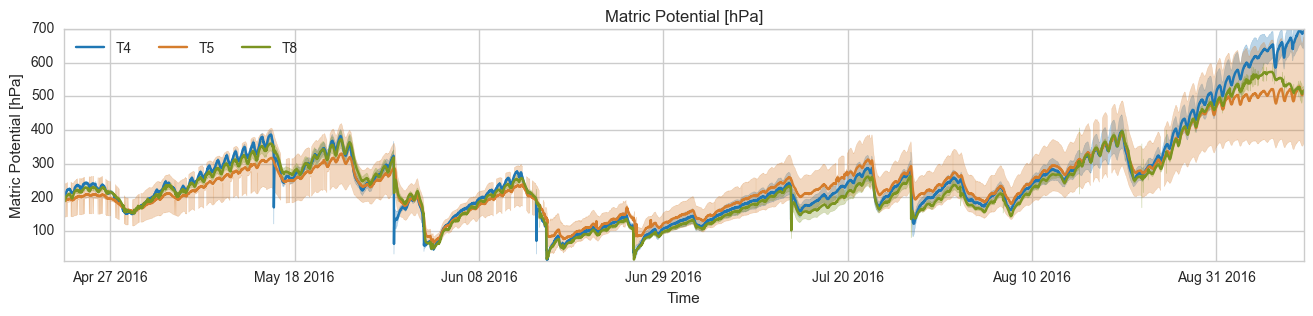

In [205]:
#ser_plot(['T4','T5','T8','SIS','MPS1','MPS2','MPS6','pFMeter'],tst,ten,1,2)
figsize(16,3)
ser_plot(['T4','T5','T8'],tst,ten,'hPa',2,3)
#ser_plot(['T8'],tst,ten)

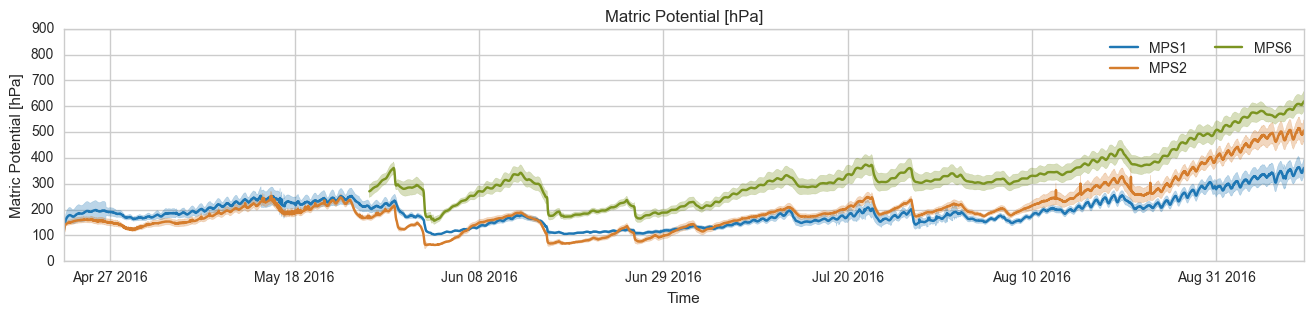

In [210]:
ser_plot(['MPS1','MPS2','MPS6'],tst,ten,'hPa',1,2)

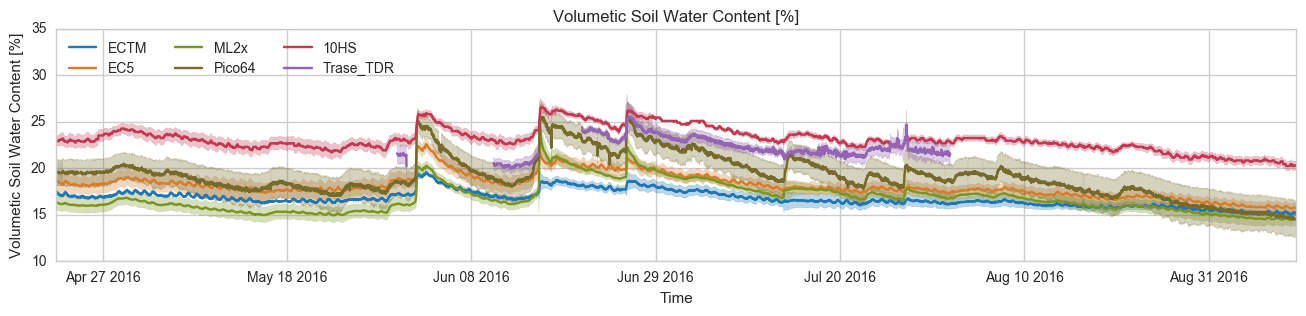

In [225]:
ser_plot(['ECTM','EC5', 'ML2x', 'Pico64', '10HS', 'Trase_TDR'],tst,ten,'%',2,3)
#ser_plot(['Trase_TDR'],tst,ten,'%',2,3)

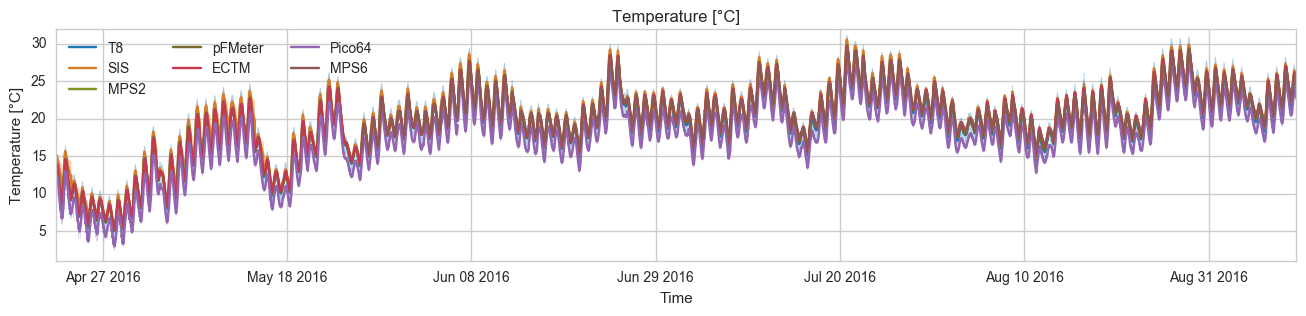

In [237]:
ser_plot(TUBS_sensor.iloc[(TUBS_meas=='°C').values].unique(),tst,ten,'°C',2,3)

# Uni Potsdam Data 

In [238]:
#UP1=pd.read_excel('./Monitoring_Daten_Stand0916/Uni_Potsdam/SMT100-DeltaProbe-TS1.xlsx',sheetname='Alle Daten',skiprows=1)
UP1=pd.read_excel('./Daten_Stand_01_2017/uni potsdam/SMT100-DeltaProbe-TS1.xlsx',sheetname='Alle Daten',skiprows=1)
UP1.index=pd.to_datetime(UP1.date)
UP1=UP1.loc[UP1.index>pd.to_datetime('2016-05-01 00:01:26')]

In [245]:
UP1.columns

Index(['date', 'Tension_Avg1', 'date+time', 'TS1-1', 'TS1-2', 'TS1-3', 'TS1-4',
       'TS1-1.1', 'TS1-2.1', 'TS1-3.1', 'TS1-4.1', 'Unnamed: 11', 'date.1',
       'Unnamed: 13', 'Unnamed: 14', 'Probe1_10', 'Probe1_20', 'Probe1_30',
       'Probe1_40', 'Probe1_60', 'Probe1_100', 'Probe2_10', 'Probe2_20',
       'Probe2_30', 'Probe2_40', 'Probe2_60', 'Probe2_100', 'Probe3_10',
       'Probe3_20', 'Probe3_30', 'Probe3_40', 'Probe3_60', 'Probe3_100',
       'Probe4_10', 'Probe4_20', 'Probe4_30', 'Probe4_40', 'Probe4_60',
       'Probe4_100', 'Unnamed: 39', 'S0_Dielek', 'S0_Wasserg', 'S0_Temp',
       'S1_Dielek', 'S1_Wasserg', 'S1_Temp', 'S2_Dielek', 'S2_Wasserg',
       'S2_Temp', 'S3_Dielek', 'S3_Wasserg', 'S3_Temp'],
      dtype='object')

In [264]:
UP2=pd.read_excel('./Daten_Stand_01_2017/uni potsdam/WET_SENSOR.xlsx',sheetname='WET_SENSOR')
UP2.index=pd.to_datetime(UP2.date)
#UP2=UP2.loc[UP2.index>pd.to_datetime('2016-05-01 00:01:26')]

In [265]:
UP3=pd.read_excel('./Daten_Stand_01_2017/uni potsdam/TMS_SENSOR.xlsx',sheetname='TMS_SENSOR')
UP3.index=pd.to_datetime(UP3.date)


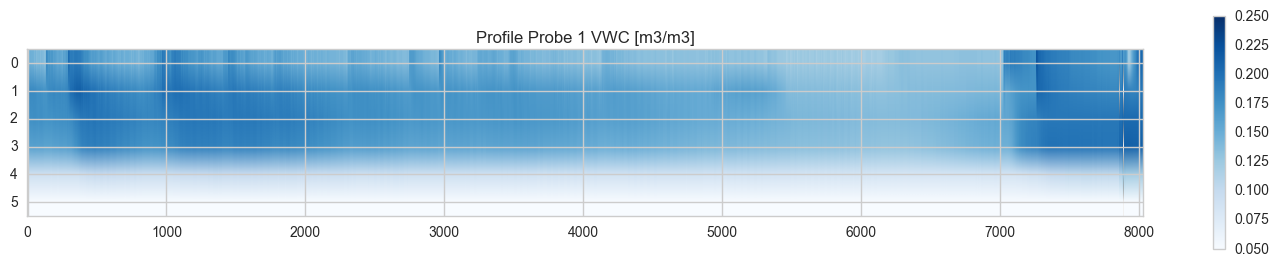

In [240]:
figsize(18,3)
imshow(UP1[['Probe1_10', 'Probe1_20', 'Probe1_30','Probe1_40', 'Probe1_60', 'Probe1_100']].T,aspect=200,cmap='Blues',vmin=0.05,vmax=0.25)
#imshow(UP1[['Probe4_10', 'Probe4_20', 'Probe4_30','Probe4_40', 'Probe4_60', 'Probe4_100']].T,aspect=200,cmap='Blues')
colorbar()
title('Profile Probe 1 VWC [m3/m3]')

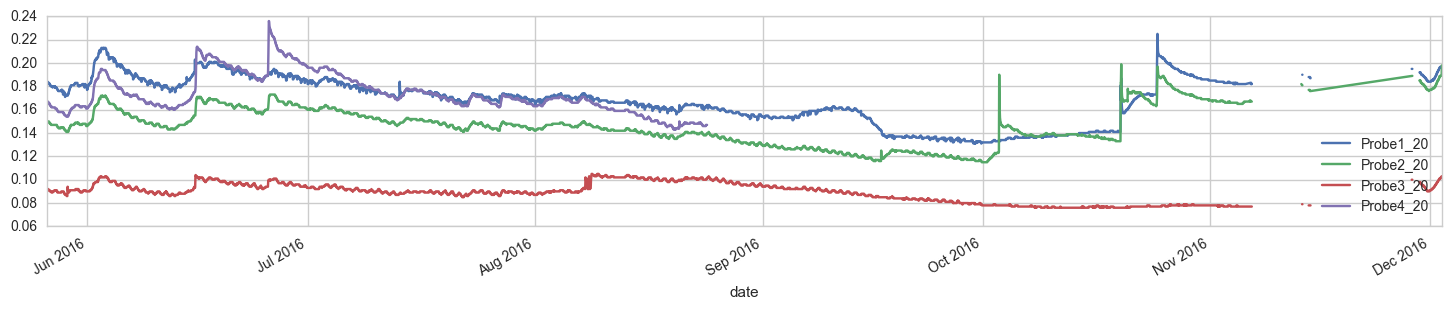

In [241]:
UP1[['Probe1_20', 'Probe2_20', 'Probe3_20','Probe4_20']].plot()

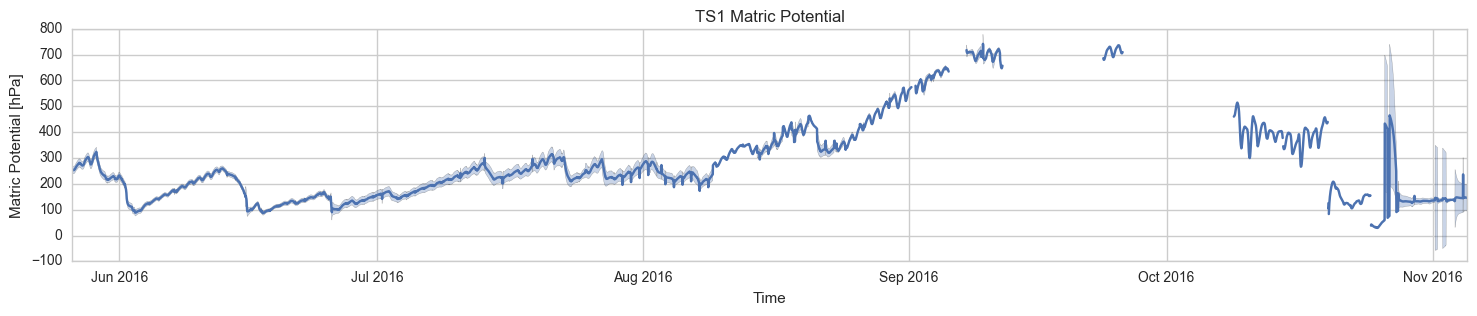

In [247]:
tst=pd.to_datetime('2016-05-15')
ten=pd.to_datetime('2016-11-05')

Ux=UP1.loc[tst:ten,['TS1-1', 'TS1-2', 'TS1-3', 'TS1-4']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('TS1 Matric Potential')
xlabel('Time')
ylabel('Matric Potential [hPa]')

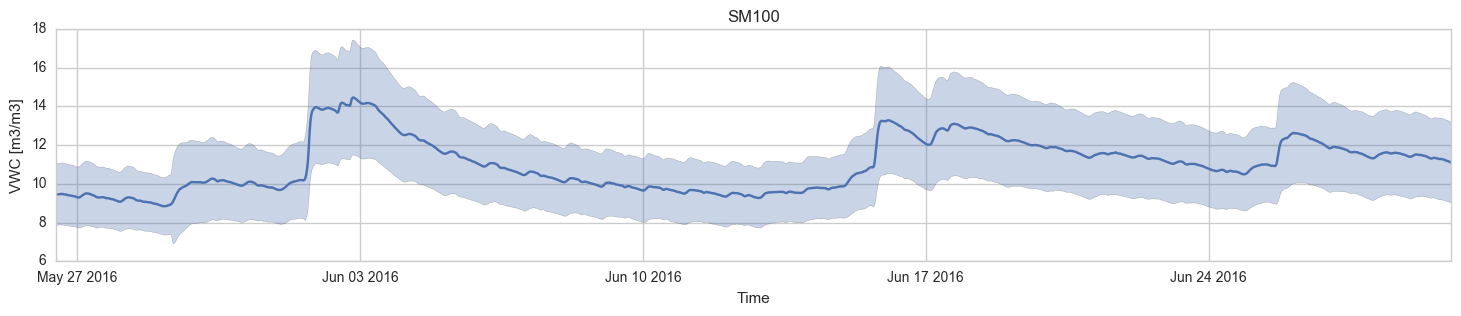

In [393]:
Ux=UP1.loc[tst:ten,['S0_Wasserg', 'S1_Wasserg', 'S2_Wasserg','S3_Wasserg']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('SM100')
xlabel('Time')
ylabel('VWC [m3/m3]')

In [ ]:
Ux=UP1.loc[tst:ten,['Probe1_20', 'Probe2_20', 'Probe3_20','Probe4_20']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('Profile Probes @ 0.2 m')
xlabel('Time')
ylabel('VWC [m3/m3]')

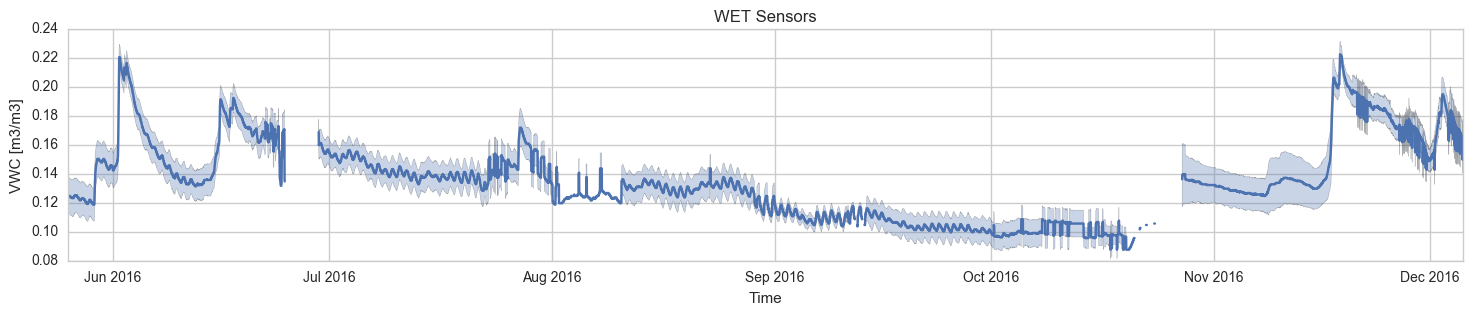

In [261]:
Ux=UP2[['theta1', 'theta2', 'theta3','theta4']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('WET Sensors')
xlabel('Time')
ylabel('VWC [m3/m3]')

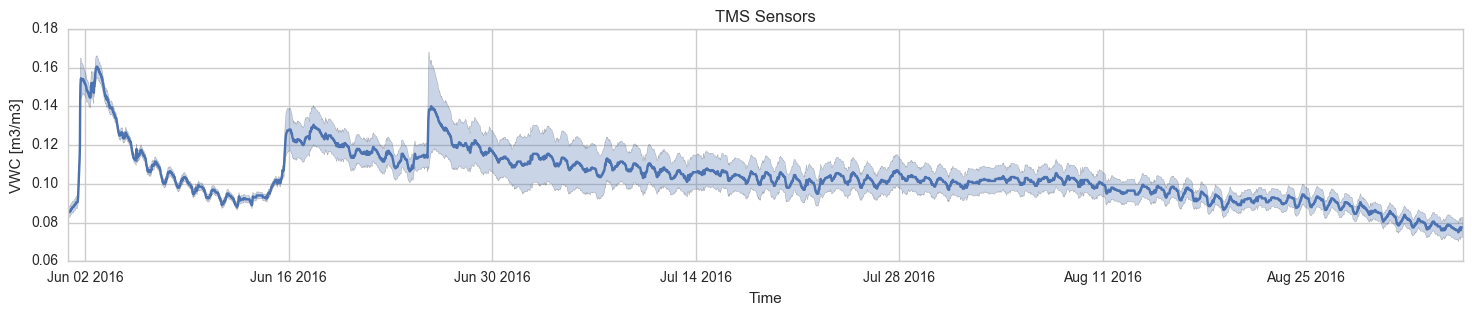

In [266]:
Ux=UP3[['vol_SM_1','vol_SM_2','vol_SM_3','vol_SM_4']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('TMS Sensors')
xlabel('Time')
ylabel('VWC [m3/m3]')

# EcoTech

In [539]:
#cols=['No','Time','#1:°C:1','#2:pF','#3:°C:2','#4:pF','#5:°C:3','#6:pF','#7:°C:4','#8:pF','#9:%:5','#10:S/m','#11:%:6','#12:S/m','#13:%:7','#14:S/m','#15:%:8','#16:S/m','#HK-Bat:V','#HK-Temp:oC','#HK-rH:%']
#ET = pd.read_csv('./Daten_Stand_01_2017/EcoTech Bonn/Rohdaten/D1023B_20161020153536komplett.csv',comment='(',na_values='(NO REPLY)',skiprows=2,sep=',',names=cols, engine='python')
#ET.index = pd.to_datetime(ET.Time,format='%d.%m.%Y %H:%M:%S')

ET=pd.read_excel('./Daten_Stand_01_2017/EcoTech Bonn/Tensiomark II & HydraProbe - Juni-August 2016.xlsx',sheetname='data')
ET.index=ET.date

ETc=pd.read_excel('./Daten_Stand_01_2017/EcoTech Bonn/Tensiomark II & HydraProbe - Juni-August 2016.xlsx',sheetname='raw data')
ETc.index=pd.to_datetime(ETc.Time)
ETc=ETc.iloc[:,[1,3,5,7]]
ETc.columns=['TM1','TM2','TM3','TM4']

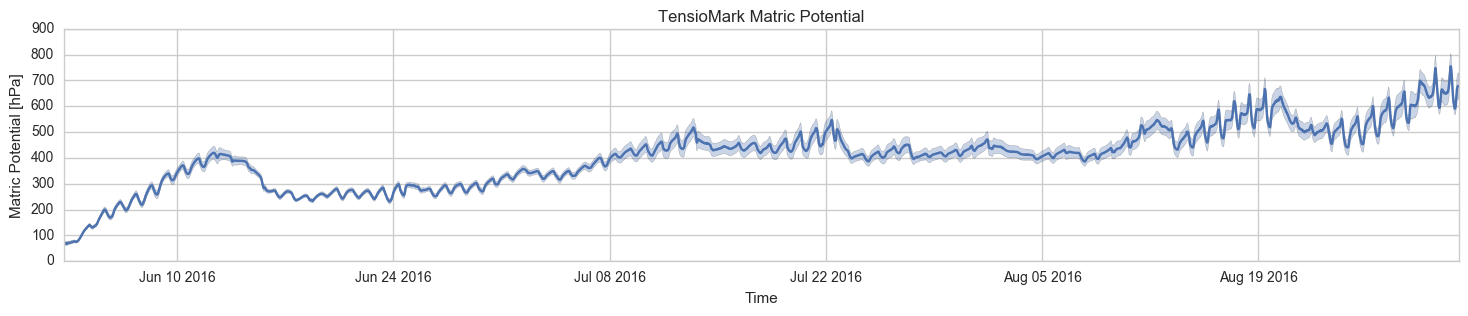

In [277]:
Ux=ET[['TM-1 (hPa)', 'TM-2 (hPa)', 'TM-3 (hPa)', 'TM-4 (hPa)']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('TensioMark Matric Potential')
xlabel('Time')
ylabel('Matric Potential [hPa]')

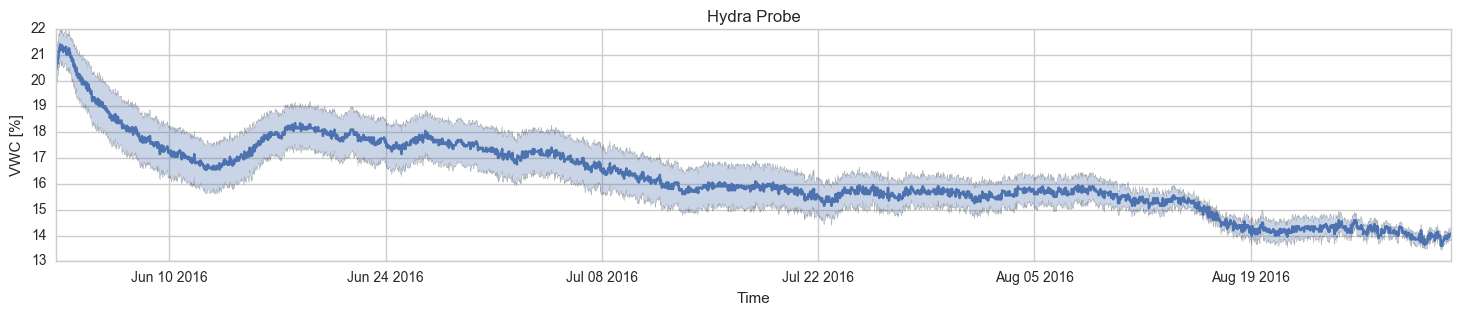

In [282]:
Ux=ET[['HY-1  (%)', 'HY-2  (%)', 'HY-3  (%)', 'HY-4  (%)']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('Hydra Probe')
xlabel('Time')
ylabel('VWC [%]')

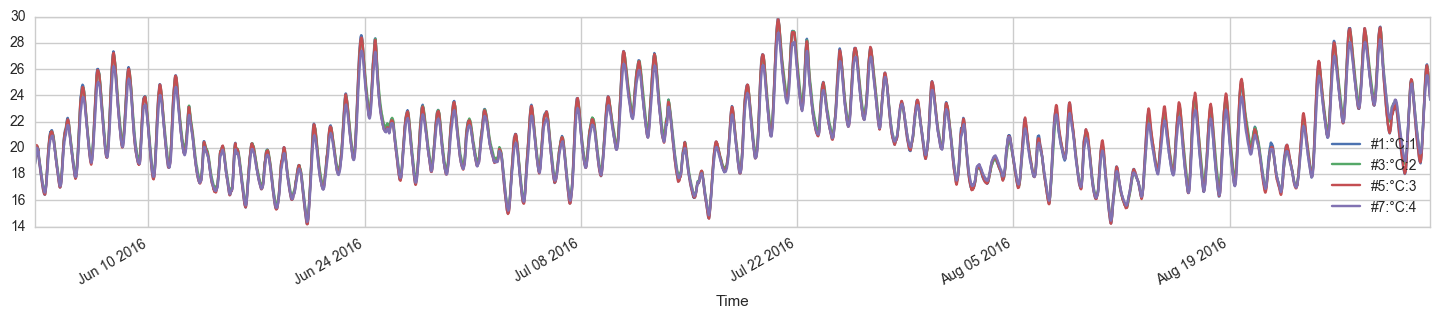

In [540]:
ETc.plot()

# BAW Petzenkirchen

In [308]:
BAW1=pd.read_excel('./Daten_Stand_01_2017/BAW Petzenkirchen/ErgebnisPhase1.xlsx',sheetname='data')
BAW2=pd.read_excel('./Daten_Stand_01_2017/BAW Petzenkirchen/ErgebnisPhase2.xlsx',sheetname='data')
BAW=pd.concat([BAW1,BAW2])

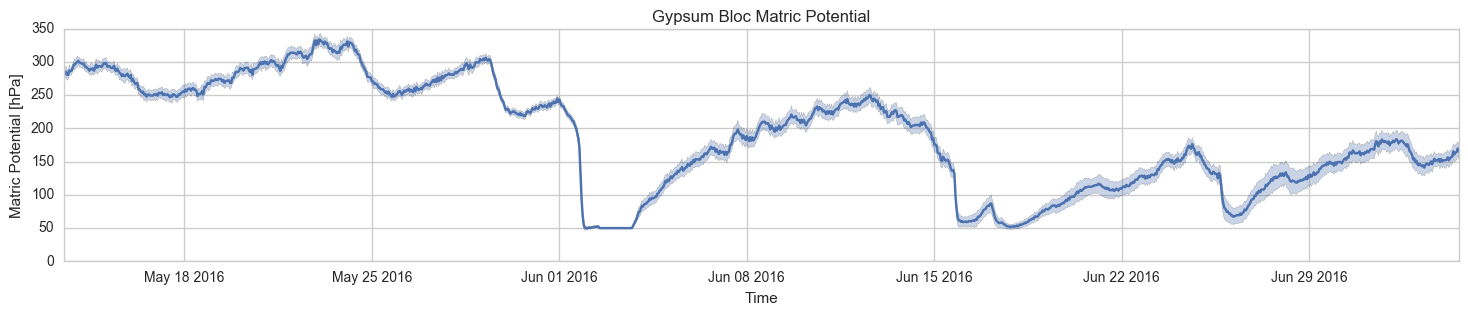

In [309]:
Ux=BAW[['PSI_1', 'PSI_2', 'PSI_3', 'PSI_4']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('Gypsum Bloc Matric Potential')
xlabel('Time')
ylabel('Matric Potential [hPa]')

# TU Prague

In [356]:
TUP1=pd.read_csv('./Daten_Stand_01_2017/tu_prag/calibrated/93168107/93168107.csv',sep=';',header=None,na_values='NAT')
TUP2=pd.read_csv('./Daten_Stand_01_2017/tu_prag/calibrated/93168108/93168108.csv',sep=';',header=None,na_values='NAT')
TUP3=pd.read_csv('./Daten_Stand_01_2017/tu_prag/calibrated/93168109/93168109.csv',sep=';',header=None,na_values='NAT')
TUP4=pd.read_csv('./Daten_Stand_01_2017/tu_prag/calibrated/93168110/93168110.csv',sep=';',header=None,na_values='NAT')

TUP1.index=pd.to_datetime(TUP1.iloc[:,1],format='%Y.%m.%d %H:%M').values
TUP2.index=pd.to_datetime(TUP2.iloc[:,1],format='%Y.%m.%d %H:%M').values
TUP3.index=pd.to_datetime(TUP3.iloc[:,1],format='%Y.%m.%d %H:%M').values
TUP4.index=pd.to_datetime(TUP4.iloc[:,1],format='%Y.%m.%d %H:%M').values

In [536]:
def TOMSTcalib(ds,cali,name):
    calidb=[[-3.00E-9, 1.61E-4, -1.10E-1], #Sand
        [-1.90E-8, 2.66E-4, -1.54E-1], #Loamy sand A
        [-2.30E-8, 2.82E-4, -1.67E-1], #Loamy sand B
        [-3.80E-8, 3.39E-4, -2.15E-1], #Sandy loam A
        [-9.00E-10, 2.62E-4, -1.59E-1], #Sandy loam B
        [-5.10E-8, 3.98E-4, -2.91E-1], #Loam
        [1.70E-8, 1.18E-4, -1.01E-1], #Silt loam
        [1.23E-7, -1.45E-4, 2.03E-1]] #Peat
    
    AA = pd.DataFrame(calidb[cali][0]*ds**2 + calidb[cali][1]*ds + calidb[cali][2])
    AA.columns=[name]
    return AA
    
TUP = pd.concat([TOMSTcalib(TUP1.iloc[:,6],2,'TOMST1'),TOMSTcalib(TUP2.iloc[:,6],2,'TOMST2'),TOMSTcalib(TUP3.iloc[:,6],2,'TOMST3'),TOMSTcalib(TUP4.iloc[:,6],2,'TOMST4')],join='outer', axis = 1).iloc[1:,:]
TUPc = pd.concat([TUP1.iloc[:,3],TUP2.iloc[:,3],TUP3.iloc[:,3],TUP4.iloc[:,3]],keys=['TOMST1','TOMST2','TOMST3','TOMST4'],join='outer', axis = 1).iloc[1:,:]

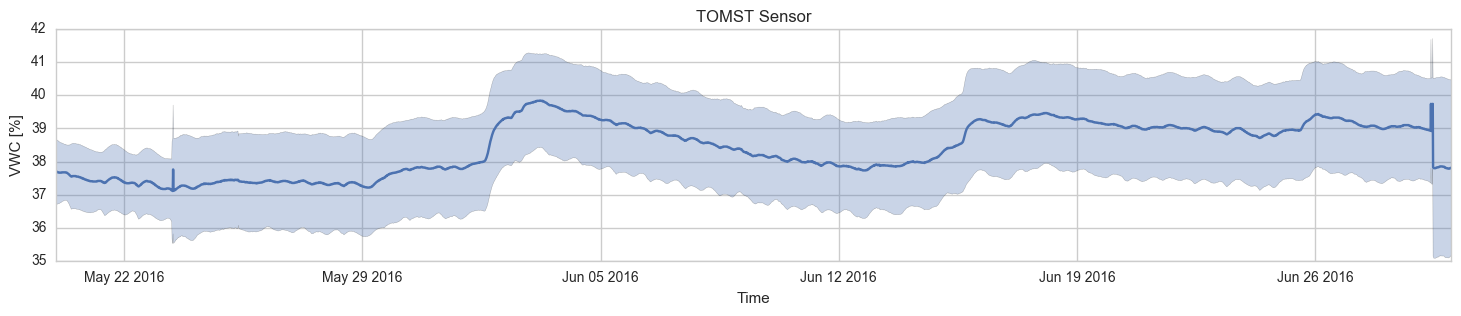

In [369]:
tst=pd.to_datetime('2016-05-20')
ten=pd.to_datetime('2016-06-30')

Ux=TUP.loc[tst:ten].copy()
Ux*=100.
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('TOMST Sensor')
xlabel('Time')
ylabel('VWC [%]')

# UFZ Halle

In [383]:
UFZ=pd.read_excel('./Daten_Stand_01_2017/UFZ_Halle/POT Data Braunschweig 2016 final results only2.xlsx',sheetname='Collected results',skiprows=2)
UFZ.index=pd.to_datetime(UFZ.Date.astype(str)+' '+UFZ.Hour.astype(str)+':'+UFZ.Minute.astype(str),format='%d.%m.%Y %H:%M').values

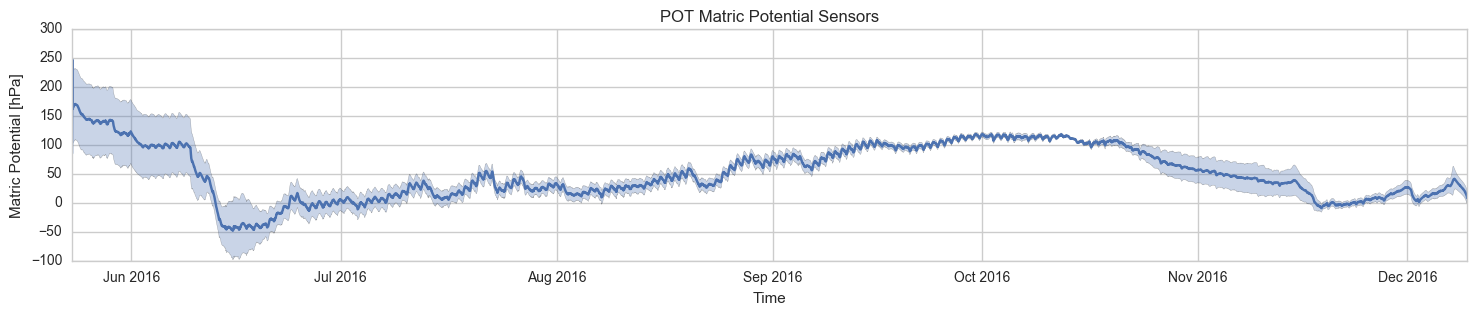

In [385]:
Ux=UFZ[['POT1_psi', 'POT2_psi', 'POT3_psi', 'POT4_psi']].copy()
Ux*=-1.
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('POT Matric Potential Sensors')
xlabel('Time')
ylabel('Matric Potential [hPa]')

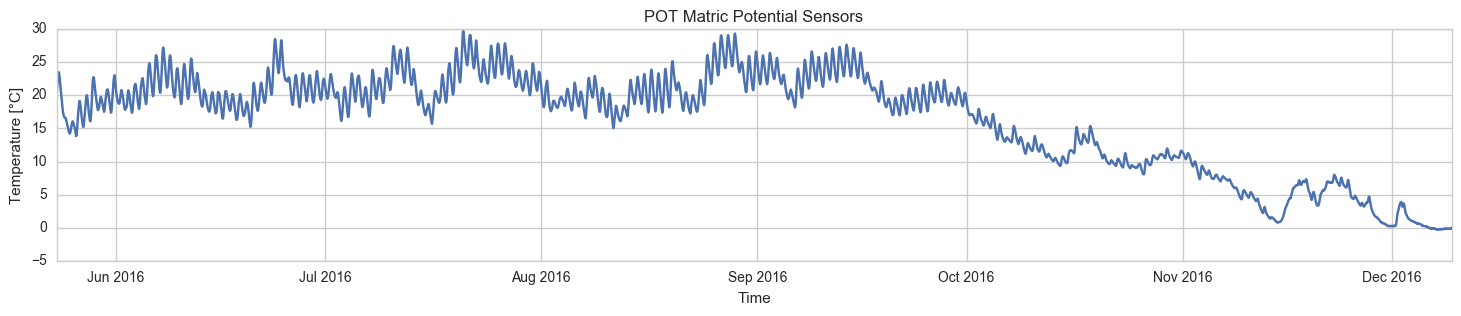

In [388]:
Ux=UFZ[['POT1_Temp ', 'POT2_Temp ', 'POT3_Temp ', 'POT4_Temp ']].copy()
fill_between(Ux.index,Ux.median(axis=1)-0.5*Ux.std(axis=1),Ux.median(axis=1)+0.5*Ux.std(axis=1),alpha=0.3)
plot(Ux.index,Ux.median(axis=1),'-')
title('POT Matric Potential Sensors')
xlabel('Time')
ylabel('Temperature [°C]')

# Master Tables

In [705]:
#Theta20
Tomst = TUP.copy() #TOMST
Tomst*=100.
Tomst=Tomst.resample('30min').mean()

ETcp = ET[['HY-1  (%)', 'HY-2  (%)', 'HY-3  (%)', 'HY-4  (%)']].copy() #Hydra
ETcp.columns = ['Hydra1','Hydra2','Hydra3','Hydra4']
ETcp=ETcp.resample('30min').mean()

UP1cp = UP1[['Probe1_20', 'Probe2_20', 'Probe3_20','Probe4_20']].copy() #ProfileProbe
UP1cp.columns = ['ProfProbe1','ProfProbe2','ProfProbe3','ProfProbe4']
UP1cp*=100.
UP1cp=UP1cp.resample('30min').mean()

UP2cp = UP2[['theta1', 'theta2', 'theta3','theta4']].copy() #WET
UP2cp.columns = ['WET1','WET2','WET3','WET4']
UP2cp*=100.
UP2cp=UP2cp.resample('30min').mean()

UP3cp = UP3[['vol_SM_1','vol_SM_2','vol_SM_3','vol_SM_4']].copy() #TMS
UP3cp.columns = ['TMS1','TMS2','TMS3','TMS4']
UP3cp*=100.
UP3cp=UP3cp.resample('30min').mean()

SMT = UP1[['S0_Wasserg', 'S1_Wasserg', 'S2_Wasserg','S3_Wasserg']].copy() #SMT100
SMT.columns = ['SMT1','SMT2','SMT3','SMT4']
SMT=SMT.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='ECTM') & (TUBS_meas=='%'))].values
ECTM=TUBS[idx].copy()
ECTM.columns= ['ECTM1','ECTM2','ECTM3','ECTM4']
ECTM=ECTM.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='EC5') & (TUBS_meas=='%'))].values
EC5=TUBS[idx].copy()
EC5.columns= ['EC51','EC52','EC53','EC54']
EC5=EC5.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='ML2x') & (TUBS_meas=='%'))].values
ML2x=TUBS[idx].copy()
ML2x.columns= ['ML2x1','ML2x2','ML2x3','ML2x4']
ML2x=ML2x.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='Pico64') & (TUBS_meas=='%'))].values
Pico64=TUBS[idx].copy()
Pico64.columns= ['Pico641','Pico642','Pico643']
Pico64=Pico64.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='10HS') & (TUBS_meas=='%'))].values
HS10=TUBS[idx].copy()
HS10.columns= ['10HS1','10HS2','10HS3','10HS4']
HS10*=100.
HS10=HS10.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='Trase_TDR') & (TUBS_meas=='%'))].values
Trase=TUBS[idx].copy()
Trase.columns= ['Trase1','Trase2','Trase3','Trase4']
Trase=Trase.resample('30min').mean()

idx=pd.Series(KIT.columns.astype(str))[((KIT_sensor=='pico32') & (KIT_meas=='theta'))].values
Pico32=KIT[idx].copy()
Pico32.columns= ['Pico321','Pico322','Pico323','Pico324']
Pico32=Pico32.resample('30min').mean()

idx=pd.Series(KIT.columns.astype(str))[((KIT_sensor=='T3P') & (KIT_meas=='theta'))].values
T3P=KIT[idx[[0,2,4,6]]].copy()
T3P.columns= ['T3P1','T3P2','T3P3','T3P4']
T3P=T3P.resample('30min').mean()

Theta20 = pd.concat([Pico32,Pico64,T3P,Trase,HS10,ECTM,EC5,SMT,ML2x,UP2cp,UP1cp,ETcp,Tomst,UP3cp],join='outer', axis = 1)

In [413]:
Theta20.to_excel('Theta20.xlsx')

In [404]:
Theta20[Theta20<2.]=np.nan

In [408]:
#get sensors for grouping
Theta20sens = pd.Series(Theta20.columns.astype(str)).apply(lambda x: x[:-1])
theta_sensors = Theta20sens.unique()

In [411]:
def theta_plot(sens,tst,ten,ll=1,lc=1):
    c=0.
    for sensor in sens:
        idx=pd.Series(Theta20.columns.astype(str))[(Theta20sens==sensor)].values
        Tx=Theta20.loc[tst:ten,idx].copy()
        kindofs='Volumetic Soil Water Content'
        unitlab='%'
        MX=35.
        MN=3.
        
        Tx[Tx>MX]=np.nan
        Tx[Tx<=MN]=np.nan
        
        fill_between(Tx.index,Tx.median(axis=1)-0.5*Tx.std(axis=1),Tx.median(axis=1)+0.5*Tx.std(axis=1),color=cm_t10(c),alpha=0.3)
        plot(Tx.index,Tx.median(axis=1),'-',color=cm_t10(c),label=sensor)
        c+=1./11.

    title(''.join([kindofs,' [',unitlab,']']))
    xlabel('Time')
    ylabel(''.join([kindofs,' [',unitlab,']']))
    ylim(MN,MX)
    legend(loc=ll,ncol=lc)

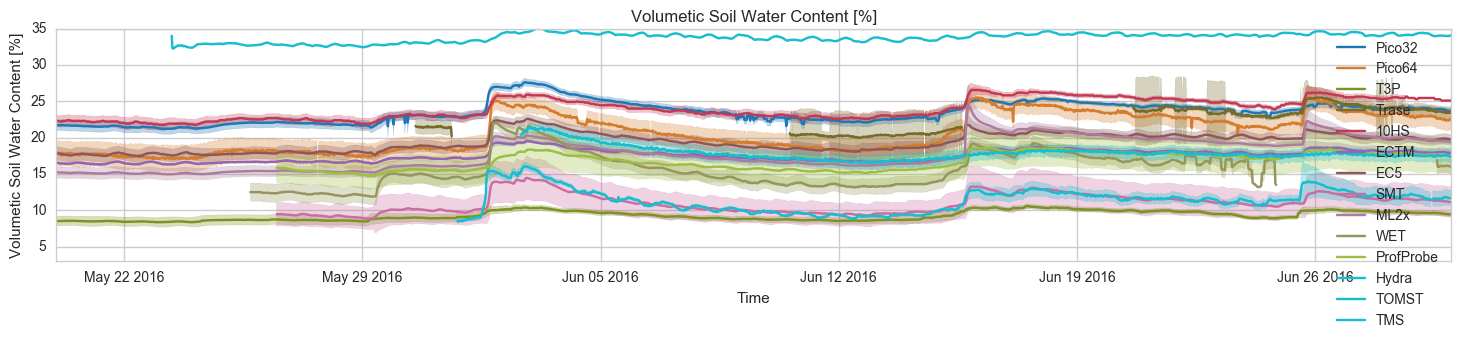

In [412]:
tst=pd.to_datetime('2016-05-20')
ten=pd.to_datetime('2016-06-30')

theta_plot(theta_sensors,tst,ten)


In [515]:
# Psi
POT=UFZ[['POT1_psi', 'POT2_psi', 'POT3_psi', 'POT4_psi']].copy()
POT*=-1.
POT.columns=['POT1', 'POT2', 'POT3', 'POT4']
POT=POT.resample('30min').mean()

Gips=BAW[['PSI_1', 'PSI_2', 'PSI_3', 'PSI_4']].copy()
Gips.columns=['Gypsum1','Gypsum2','Gypsum3','Gypsum4']
Gips=Gips.resample('30min').mean()
Gips=Gips.interpolate()

TM=ET[['TM-1 (hPa)', 'TM-2 (hPa)', 'TM-3 (hPa)', 'TM-4 (hPa)']].copy()
TM.columns=['TM1','TM2','TM3','TM4']
TM=TM.resample('30min').mean()

TS=UP1.loc[tst:ten,['TS1-1', 'TS1-2', 'TS1-3', 'TS1-4']].copy()
TS.columns=['TS1','TS2','TS3','TS4']
TS=TS.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='T4') & (TUBS_meas=='hPa'))].values
T4=TUBS[idx].copy()
T4.columns= ['T41','T42','T43','T44']
T4=T4.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='T5') & (TUBS_meas=='hPa'))].values
T5=TUBS[idx].copy()
T5.columns= ['T51','T52','T53','T54']
T5=T5.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='T8') & (TUBS_meas=='hPa'))].values
T8=TUBS[idx].copy()
T8=T8.iloc[:,[0,1,3,4]]
T8.columns= ['T81','T82','T84','T85']
T8=T8.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='SIS') & (TUBS_meas=='hPa'))].values
SIS=TUBS[idx].copy()
SIS.columns= ['SIS1','SIS2','SIS3','SIS4']
SIS=pd.concat([edp_filter(SIS.SIS3),edp_filter(SIS.SIS4)],axis=1,join='outer')
SIS=SIS.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='MPS1') & (TUBS_meas=='kPa'))].values
MPS1=TUBS[idx].copy()
MPS1*=-10.
MPS1.columns= ['MPS11','MPS12','MPS13','MPS14']
MPS1=MPS1.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='MPS2') & (TUBS_meas=='hPa'))].values
MPS2=TUBS[idx].copy()
MPS2*=-1.
MPS2.columns= ['MPS21','MPS22','MPS23','MPS24']
MPS2=MPS2.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='MPS6') & (TUBS_meas=='kPa'))].values
MPS6=TUBS[idx].copy()
MPS6*=-10.
MPS6.columns= ['MPS61','MPS62','MPS63','MPS64']
MPS6=MPS6.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='pFMeter') & (TUBS_meas=='pF'))].values
pFMeter=TUBS[idx].copy()
pFMeter=10**pFMeter
pFMeter.columns= ['pFMeter3','pFMeter4']
pFMeter=pFMeter.resample('30min').mean()

HDis = pd.concat([10**edp_filter(KIT.TM1_1_pF),10**edp_filter(KIT.TM1_2_pF),10**edp_filter(KIT.TM1_3_pF),10**edp_filter(KIT.TM1_4_pF)],axis=1)
HDis.columns=['HDis1','HDis2','HDis3','HDis4']
HDis=HDis.resample('30min').mean()

Psi20 = pd.concat([T4,T5,T8,MPS1,MPS2,MPS6,TS,SIS,TM,HDis,pFMeter,Gips,POT],join='outer', axis = 1)

In [516]:
Psi20.to_excel('Psi20.xlsx')

In [517]:
Psi20[Psi20>1300.]=np.nan
Psi20[Psi20<1.]=np.nan

In [518]:
#get sensors for grouping
Psi20sens = pd.Series(Psi20.columns.astype(str)).apply(lambda x: x[:-1])
psi_sensors = Psi20sens.unique()

In [519]:
def psi_plot(sens,tst,ten,ll=1,lc=1):
    c=0.
    for sensor in sens:
        idx=pd.Series(Psi20.columns.astype(str))[(Psi20sens==sensor)].values
        Tx=Psi20.loc[tst:ten,idx].copy()
        kindofs='Matric Potential'
        unitlab='hPa'
        MX=900.
        MN=1.
        
        Tx[Tx>MX]=np.nan
        Tx[Tx<=MN]=np.nan
        
        fill_between(Tx.index,Tx.median(axis=1)-0.5*Tx.std(axis=1),Tx.median(axis=1)+0.5*Tx.std(axis=1),color=cm_t10(c),alpha=0.3)
        plot(Tx.index,Tx.median(axis=1),'-',color=cm_t10(c),label=sensor)
        c+=1./11.

    title(''.join([kindofs,' [',unitlab,']']))
    xlabel('Time')
    ylabel(''.join([kindofs,' [',unitlab,']']))
    ylim(MN,MX)
    legend(loc=ll,ncol=lc)

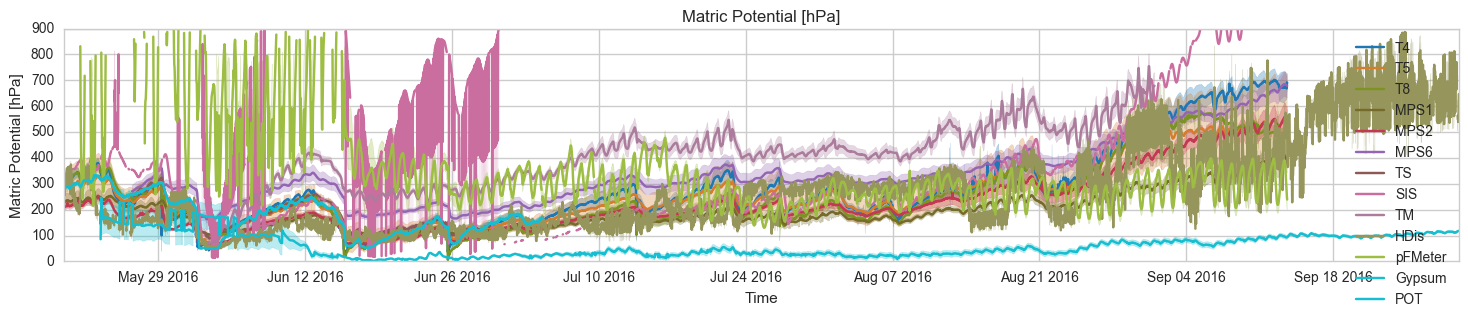

In [525]:
tst=pd.to_datetime('2016-05-20')
ten=pd.to_datetime('2016-09-30')

psi_plot(psi_sensors,tst,ten)



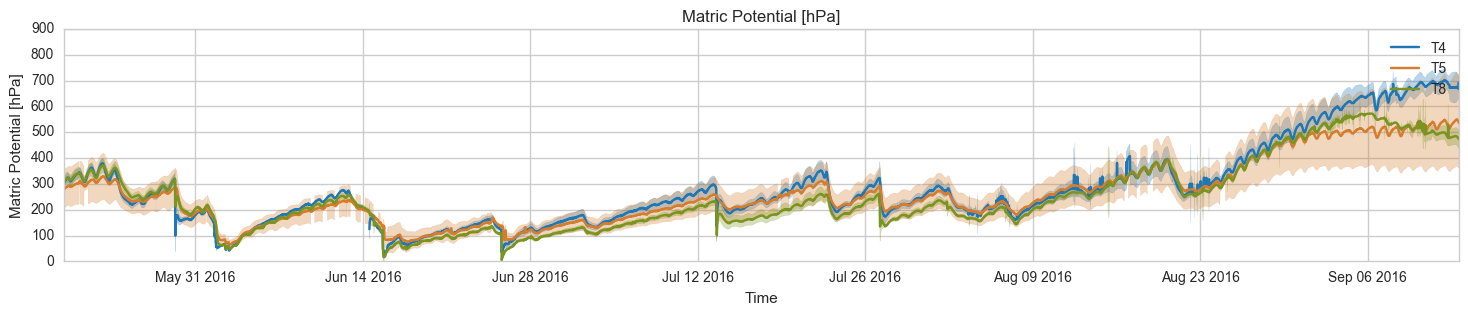

In [529]:
psi_plot(['T4','T5','T8'],tst,ten)
#psi_plot(['T4','MPS1','MPS2','MPS6'],tst,ten)
#psi_plot(['T4','Gypsum','POT','TM','TS'],tst,ten)
#psi_plot(['T4','SIS','HDis','pFMeter'],tst,ten)

In [575]:
# °C

idx=pd.Series(KIT.columns.astype(str))[((KIT_sensor=='TM1') & (KIT_meas=='T'))].values
HDis=KIT[idx].copy()
HDis.columns= ['HDis1','HDis2','HDis3','HDis4']
HDis=HDis.resample('30min').mean()

idx=pd.Series(KIT.columns.astype(str))[((KIT_sensor=='pico32') & (KIT_meas=='T'))].values
Pico32=KIT[idx].copy()
Pico32.columns= ['Pico321','Pico322','Pico323','Pico324']
Pico32=Pico32.resample('30min').mean()

POT=UFZ[['POT1_Temp ', 'POT2_Temp ', 'POT3_Temp ', 'POT4_Temp ']].copy()
POT.columns= ['POT1','POT2','POT3','POT4']
POT=POT.resample('30min').mean()

TOMST=TUPc.copy()
TOMST=TOMST.resample('30min').mean()

TM=ETc.copy()
TM.columns=['TM1','TM2','TM3','TM4']
TM=TM.resample('30min').mean()

WET=UP2[['Temp1', 'Temp2', 'Temp3','Temp4']].copy()
WET.columns=['WET1','WET2','WET3','WET4']
WET=WET.resample('30min').mean()

TMS=UP3[['T3_1', 'T3_2', 'T3_3','T3_4']].copy()
TMS.columns=['TMS1','TMS2','TMS3','TMS4']
TMS=TMS.resample('30min').mean()

SMT=UP1[['S0_Temp', 'S1_Temp','S2_Temp', 'S3_Temp']].copy()
SMT.columns=['SMT1','SMT2','SMT3','SMT4']
SMT=SMT.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='T8') & (TUBS_meas=='°C'))].values
T8=TUBS[idx].copy()
T8=T8.iloc[:,[0,1,3,4]]
T8.columns= ['T81','T82','T84','T85']
T8=T8.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='SIS') & (TUBS_meas=='°C'))].values
SIS=TUBS[idx].copy()
SIS.columns= ['SIS1','SIS2','SIS3','SIS4']
SIS=SIS.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='MPS2') & (TUBS_meas=='°C'))].values
MPS2=TUBS[idx].copy()
MPS2.columns= ['MPS21','MPS22','MPS23','MPS24']
MPS2=MPS2.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='MPS6') & (TUBS_meas=='°C'))].values
MPS6=TUBS[idx].copy()
MPS6.columns= ['MPS61','MPS62','MPS63','MPS64']
MPS6=MPS6.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='Pico64') & (TUBS_meas=='°C'))].values
Pico64=TUBS[idx].copy()
Pico64.columns= ['Pico641','Pico642','Pico643']
Pico64[Pico64>45.]=np.nan
Pico64[Pico64<=-8.]=np.nan
Pico64=Pico64.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='ECTM') & (TUBS_meas=='°C'))].values
ECTM=TUBS[idx].copy()
ECTM.columns= ['ECTM1','ECTM2','ECTM3','ECTM4']
ECTM=ECTM.resample('30min').mean()

idx=pd.Series(TUBS.columns.astype(str))[( (TUBS_sensor=='pFMeter') & (TUBS_meas=='°C'))].values
pFMeter=TUBS[idx].copy()
pFMeter.columns= ['pFMeter3','pFMeter4']
pFMeter=pFMeter.resample('30min').mean()

T20 = pd.concat([Pico32,Pico64,ECTM,MPS2,MPS6,pFMeter,TM,HDis,SIS,SMT,WET,TOMST,POT,T8,TMS],join='outer', axis = 1)


In [576]:
T20.to_excel('T20.xlsx')

In [577]:
T20[T20>45.]=np.nan
T20[T20<=0.]=np.nan

In [578]:
#get sensors for grouping
T20sens = pd.Series(T20.columns.astype(str)).apply(lambda x: x[:-1])
T_sensors = T20sens.unique()

In [579]:
def T_plot(sens,tst,ten,ll=1,lc=1):
    c=0.
    for sensor in sens:
        idx=pd.Series(T20.columns.astype(str))[(T20sens==sensor)].values
        Tx=T20.loc[tst:ten,idx].copy()
        kindofs='Soil Temperature'
        unitlab='°C'
        MX=42.
        MN=0.
        
        Tx[Tx>MX]=np.nan
        Tx[Tx<=MN]=np.nan
        
        fill_between(Tx.index,Tx.median(axis=1)-0.5*Tx.std(axis=1),Tx.median(axis=1)+0.5*Tx.std(axis=1),color=cm_t10(c),alpha=0.3)
        plot(Tx.index,Tx.median(axis=1),'-',color=cm_t10(c),label=sensor)
        c+=1./11.

    title(''.join([kindofs,' [',unitlab,']']))
    xlabel('Time')
    ylabel(''.join([kindofs,' [',unitlab,']']))
    ylim(MN,MX)
    legend(loc=ll,ncol=lc)

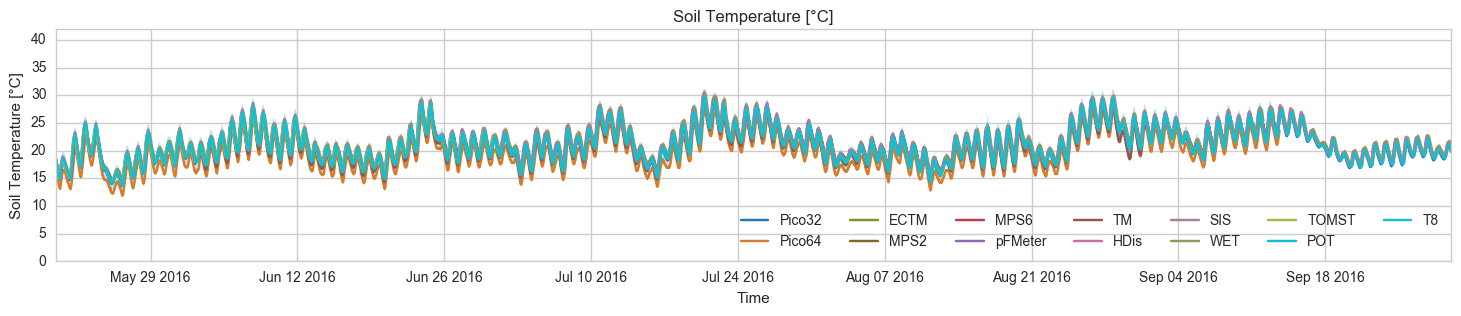

In [580]:
#[Pico32,Pico64,ECTM,MPS2,MPS6,pFMeter,TM,HDis,SIS,SMT,WET,TOMST,POT,T8,TMS]
tst=pd.to_datetime('2016-05-20')
ten=pd.to_datetime('2016-09-30')

#T_plot(T_sensors,tst,ten)
T_plot(['Pico32', 'Pico64', 'ECTM', 'MPS2', 'MPS6', 'pFMeter', 'TM', 'HDis',
       'SIS', 'WET', 'TOMST', 'POT', 'T8'],tst,ten,4,7)

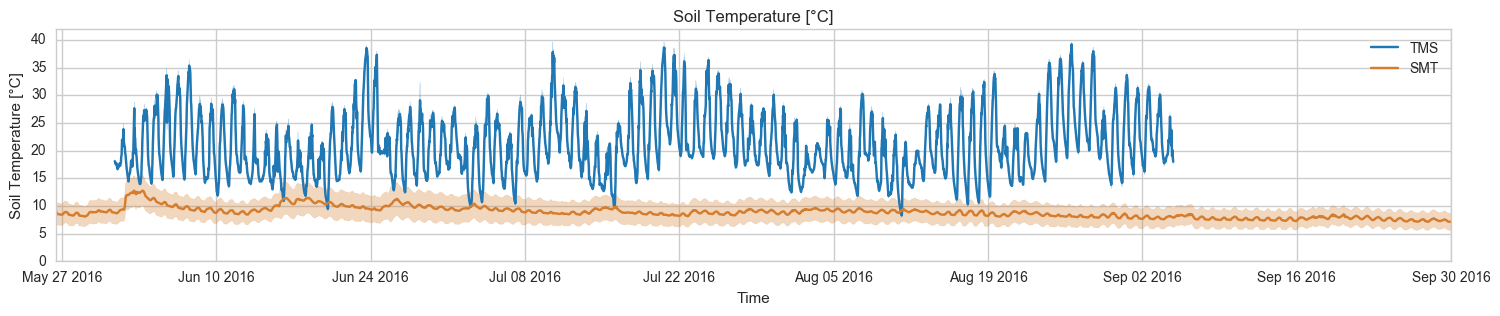

In [581]:
T_plot(['TMS','SMT'],tst,ten)

In [587]:
# METEO
#dwd.columns

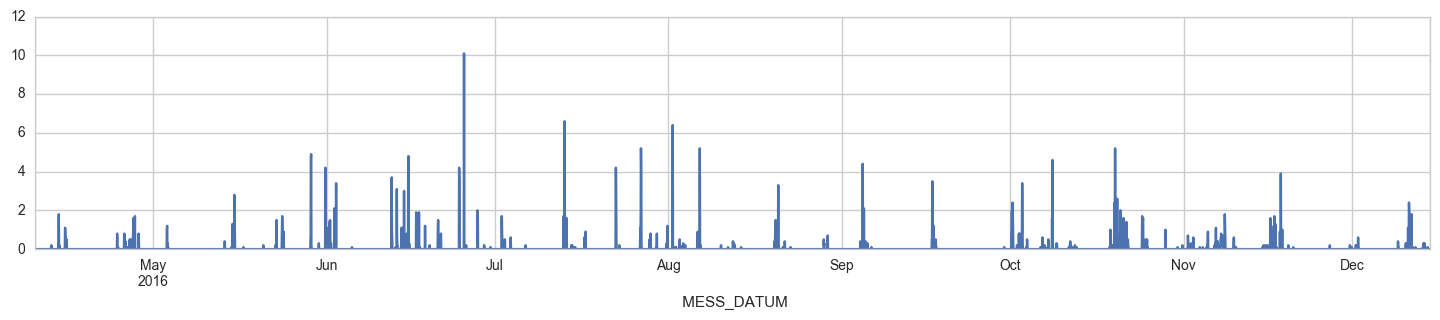

In [590]:
dwdR = dwd[[' LUFTTEMPERATUR', 'REL_FEUCHTE','NIEDERSCHLAGSHOEHE',' ERDBODENTEMPERATUR.3','GLOBAL_KW_J',' WINDGESCHWINDIGKEIT', 'WINDRICHTUNG']]
dwdR.columns=['AirT','RH','Precip','SoilT','RAD','u2','wdir']
dwdR.Precip.plot()

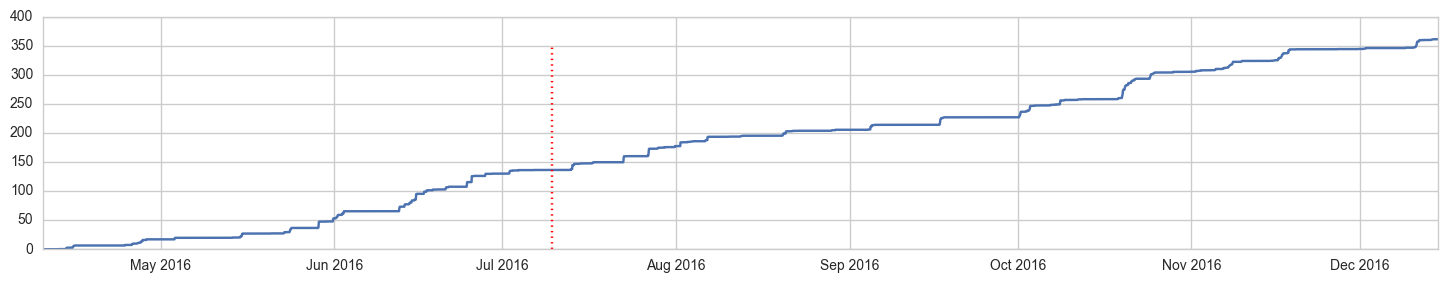

In [625]:
tbreak=pd.to_datetime('2016-07-10')
id_br=2182
plot(dwdR.index,dwdR.Precip.cumsum())
plot([dwdR.index.values[id_br],dwdR.index.values[id_br]],[0,350],'r:')

In [626]:
dwdR.index.values[id_br]

numpy.datetime64('2016-07-10T00:00:00.000000000+0200')

In [601]:
#Analyse spatial variance against sensor variance based on Temperature
def T_std(sens,tst,ten):
    idx=pd.Series(T20.columns.astype(str))[(T20sens==sens)].values
    Tx=T20.loc[tst:ten,idx].copy()
    AA = Tx.std(axis=1)
    AA[AA>4] = np.nan
    return AA


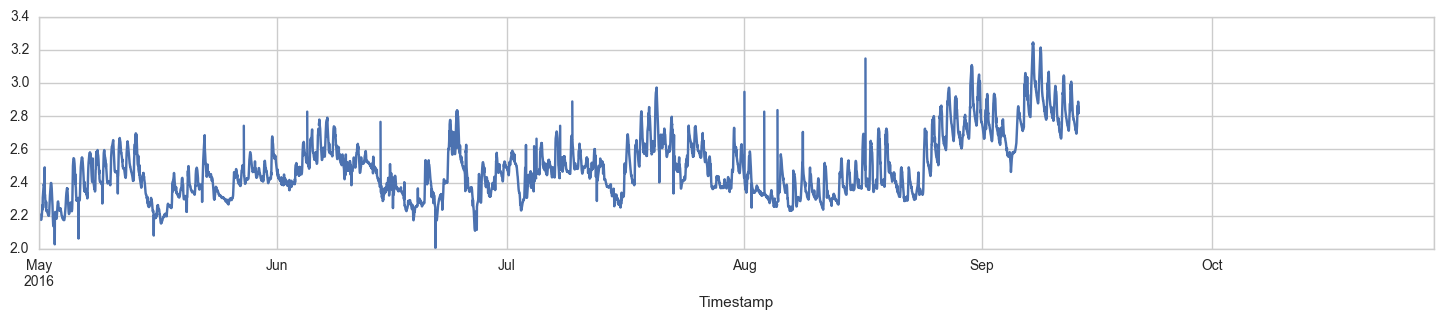

In [644]:
tst=pd.to_datetime('2016-05-01')
ten=pd.to_datetime('2016-10-30')

dummy=T_std('T8',tst,ten)
regression = pd.ols(y=dummy.values[dummy.values>0.], x=pd.Series(np.arange(len(dummy)))[dummy.values>0.])
trend = regression.predict(beta=regression.beta, x=pd.Series(np.arange(len(dummy))[::100])) # use fewer points



In [593]:
T_sensors

array(['Pico32', 'Pico64', 'ECTM', 'MPS2', 'MPS6', 'pFMeter', 'TM', 'HDis',
       'SIS', 'SMT', 'WET', 'TOMST', 'POT', 'T8', 'TMS'], dtype=object)

/Users/cojack/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


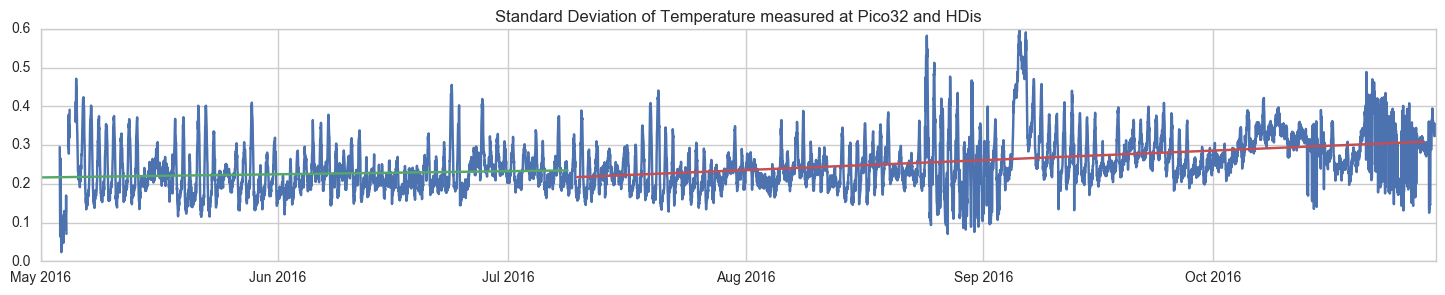

In [676]:
tst=pd.to_datetime('2016-05-01')
ten=pd.to_datetime('2016-10-30')
tbreak=pd.to_datetime('2016-07-10')

act_sens=T20.columns[((T20.loc[tst:ten]>0.).sum(axis=0)/len(T20.loc[tst:ten])>0.9).values]

dummy=T20.loc[tst:ten,act_sens].std(axis=1)
dummy[dummy>2]=np.nan

id_br1 = np.where(dummy.index==tbreak)[0]
regression1 = pd.ols(y=dummy.iloc[np.arange(id_br1)].values[dummy.iloc[np.arange(id_br1)].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)])))[dummy.iloc[np.arange(id_br1)].values>0.])
trend1 = regression1.predict(beta=regression1.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)]))[::100])) # use fewer points
regression2 = pd.ols(y=dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]])))[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.])
trend2 = regression2.predict(beta=regression2.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]]))[::100])) # use fewer points

plot(dummy.index,dummy)
plot(dummy.iloc[np.arange(id_br1)].index[::100],trend1)
plot(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].index[::100],trend2)
title('Standard Deviation of Temperature measured at '+' and '.join(pd.Series(act_sens.values).apply(lambda x: x[:-1]).unique()))

/Users/cojack/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


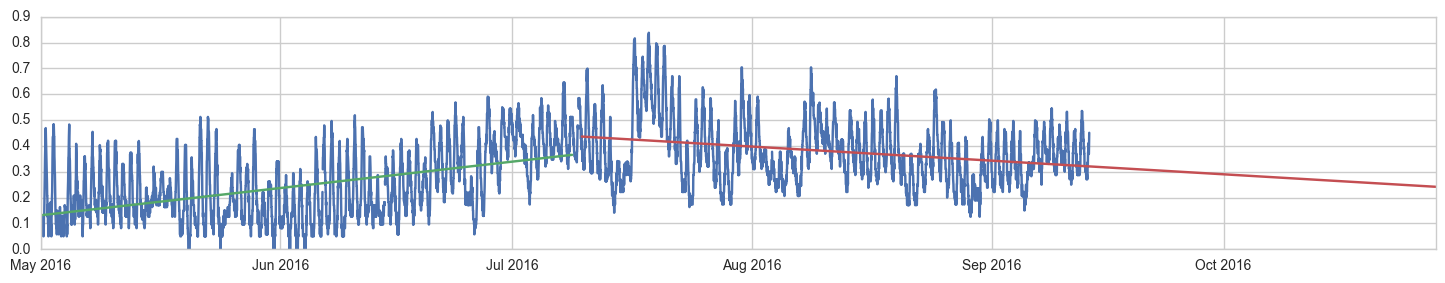

In [647]:
tst=pd.to_datetime('2016-05-01')
ten=pd.to_datetime('2016-10-30')
#dummy = T_std('Pico32',tst,ten)
dummy = T_std('ECTM',tst,ten)
id_br1 = np.where(dummy.index==tbreak)[0]
regression1 = pd.ols(y=dummy.iloc[np.arange(id_br1)].values[dummy.iloc[np.arange(id_br1)].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)])))[dummy.iloc[np.arange(id_br1)].values>0.])
trend1 = regression1.predict(beta=regression1.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)]))[::100])) # use fewer points
regression2 = pd.ols(y=dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]])))[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.])
trend2 = regression2.predict(beta=regression2.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]]))[::100])) # use fewer points

plot(dummy.index,dummy)
plot(dummy.iloc[np.arange(id_br1)].index[::100],trend1)
plot(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].index[::100],trend2)


In [725]:
#Analyse spatial variance against sensor variance based on Theta
def Theta_std(sens,tst,ten):
    idx=pd.Series(Theta20.columns.astype(str))[(Theta20sens==sens)].values
    Tx=Theta20.loc[tst:ten,idx].copy()
    AA = Tx.std(axis=1)
    AA[AA.diff().abs()>2] = np.nan
    AA[AA>8] = np.nan
    return AA

/Users/cojack/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


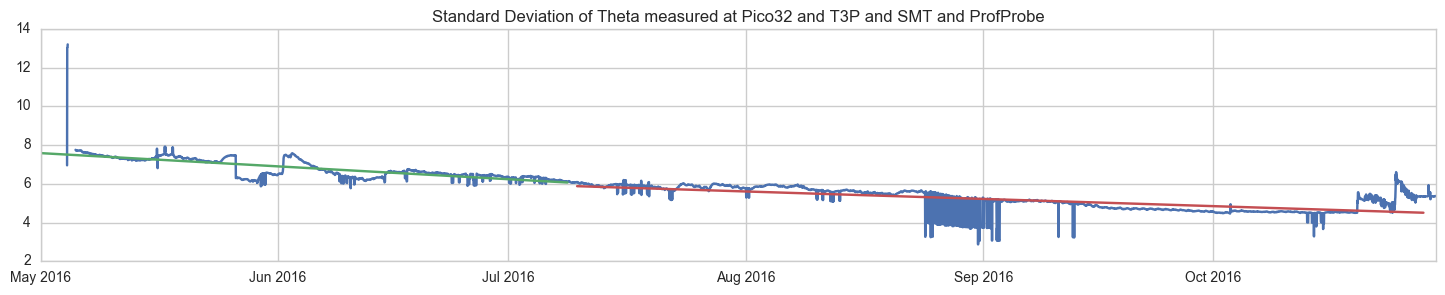

In [681]:
tst=pd.to_datetime('2016-05-01')
ten=pd.to_datetime('2016-10-30')
tbreak=pd.to_datetime('2016-07-10')

act_sens=Theta20.columns[((Theta20.loc[tst:ten]>0.).sum(axis=0)/len(Theta20.loc[tst:ten])>0.8).values]

dummy=Theta20.loc[tst:ten,act_sens].std(axis=1)

id_br1 = np.where(dummy.index==tbreak)[0]
regression1 = pd.ols(y=dummy.iloc[np.arange(id_br1)].values[dummy.iloc[np.arange(id_br1)].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)])))[dummy.iloc[np.arange(id_br1)].values>0.])
trend1 = regression1.predict(beta=regression1.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)]))[::100])) # use fewer points
regression2 = pd.ols(y=dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]])))[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.])
trend2 = regression2.predict(beta=regression2.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]]))[::100])) # use fewer points

plot(dummy.index,dummy)
plot(dummy.iloc[np.arange(id_br1)].index[::100],trend1)
plot(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].index[::100],trend2)
title('Standard Deviation of Theta measured at '+' and '.join(pd.Series(act_sens.values).apply(lambda x: x[:-1]).unique()))

In [683]:
Theta20sens.unique()

array(['Pico32', 'Pico64', 'T3P', 'Trase', '10HS', 'ECTM', 'EC5', 'SMT',
       'ML2x', 'WET', 'ProfProbe', 'Hydra', 'TOMST', 'TMS'], dtype=object)

/Users/cojack/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


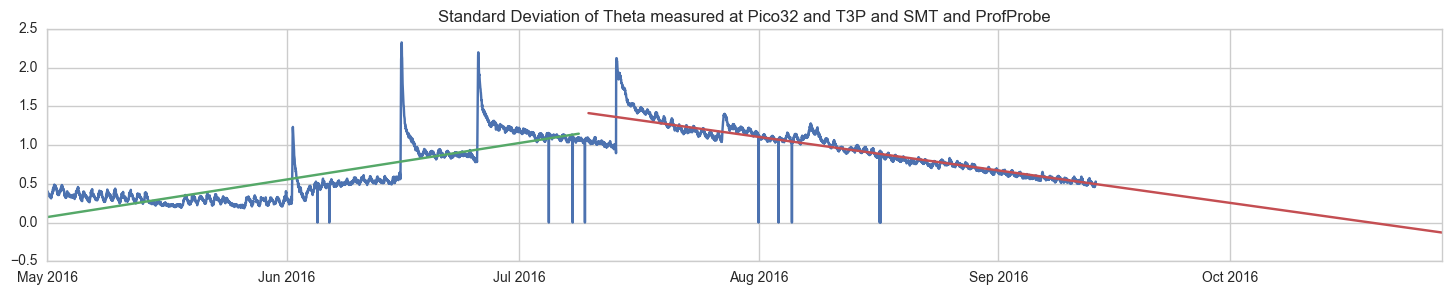

In [709]:
dummy=Theta_std('ECTM',tst,ten)

id_br1 = np.where(dummy.index==tbreak)[0]
regression1 = pd.ols(y=dummy.iloc[np.arange(id_br1)].values[dummy.iloc[np.arange(id_br1)].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)])))[dummy.iloc[np.arange(id_br1)].values>0.])
trend1 = regression1.predict(beta=regression1.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(id_br1)]))[::100])) # use fewer points
regression2 = pd.ols(y=dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.], x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]])))[dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].values>0.])
trend2 = regression2.predict(beta=regression2.beta, x=pd.Series(np.arange(len(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]]))[::100])) # use fewer points

plot(dummy.index,dummy)
plot(dummy.iloc[np.arange(id_br1)].index[::100],trend1)
plot(dummy.iloc[np.arange(len(dummy))[id_br1[0]:]].index[::100],trend2)
title('Standard Deviation of Theta measured at '+' and '.join(pd.Series(act_sens.values).apply(lambda x: x[:-1]).unique()))

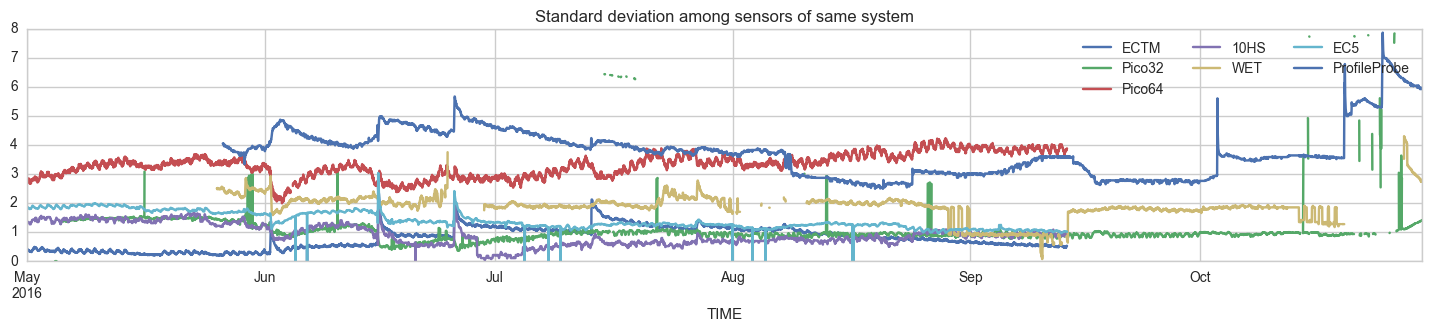

In [726]:
Theta_std('ECTM',tst,ten).plot(label='ECTM')
Theta_std('Pico32',tst,ten).plot(label='Pico32')
Theta_std('Pico64',tst,ten).plot(label='Pico64')
Theta_std('10HS',tst,ten).plot(label='10HS')
#Theta_std('Trase',tst,ten).plot()
Theta_std('WET',tst,ten).plot(label='WET')
Theta_std('EC5',tst,ten).plot(label='EC5')
Theta_std('ProfProbe',tst,ten).plot(label='ProfileProbe')
legend(ncol=3)
title('Standard deviation among sensors of same system')

In [733]:
Psi20sens.unique()

array(['T4', 'T5', 'T8', 'MPS1', 'MPS2', 'MPS6', 'TS', 'SIS', 'TM', 'HDis',
       'pFMeter', 'Gypsum', 'POT'], dtype=object)

In [737]:
#Analyse spatial variance against sensor variance based on Psi
def Psi_std(sens,tst,ten):
    idx=pd.Series(Psi20.columns.astype(str))[(Psi20sens==sens)].values
    Tx=Psi20.loc[tst:ten,idx].copy()
    AA = Tx.std(axis=1)
    AA[AA.diff().abs()>50] = np.nan
    #AA[AA>8] = np.nan
    return AA

(0, 150)

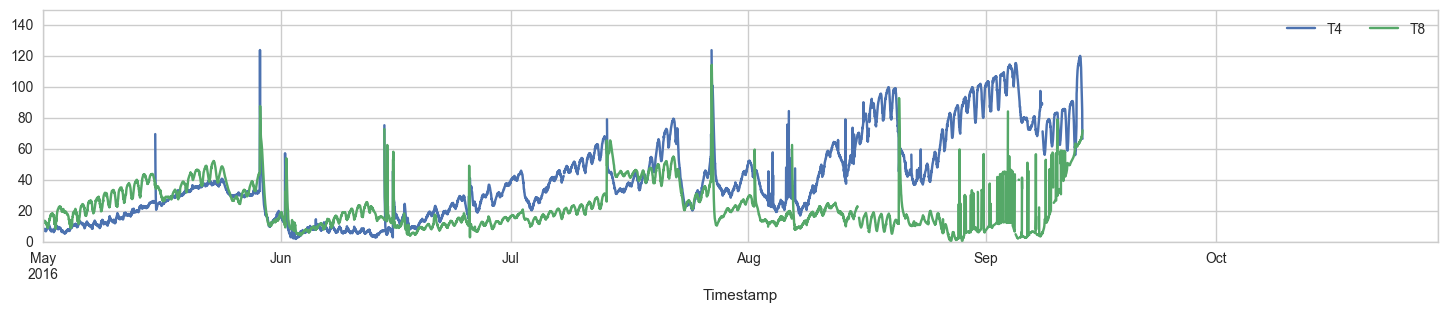

In [744]:
#for sens in Psi20sens.unique():
#for sens in  ['T4', 'T5', 'T8', 'MPS1', 'MPS2', 'MPS6', 'TS', 'TM', 'HDis', 'Gypsum', 'POT']:
for sens in  ['T4', 'T8']:
    Psi_std(sens,tst,ten).plot(label=sens)
legend(ncol=3)
ylim(0,150)